In [52]:
"""author: sarah konrad, data+ 2023
supervised text clustering!
"""
import csv
from collections import defaultdict, Counter
import pandas as pd
import os
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

#all functions written here
def gettexts(folder):
    texts = []
    #list of lists of strings, each text broken up into individual token strings
    tokenized = []
    #list of texts as a continuous string
    textnames = []
    for file in os.listdir(folder):
        path = os.path.join(folder,file)
        name = os.path.basename(file)
        f = open(path,'r', encoding="utf-8")
        data = f.read()
        textnames.append(name)
        texts.append(data)
        f.close()
    for text in texts:
        #tokenize by white space
        words = text.strip().split(' ')
        tokenized.append(words)
    return [tokenized, texts, textnames]

def get_relevant_ids(dictionary):
    id_list = []
    existing_files = []
    for file in os.scandir(r"/hpc/group/datap2023ecbc/supervised_class_NotAccurate"):
        name  = os.path.basename(file).split(".")[0]
        existing_files.append(name)
    for key in dictionary.keys():
        if key in existing_files:
            id_list.append(key)
    return id_list

def move_relevant_ids(id_list):
    for file in os.scandir(r"/hpc/group/datap2023ecbc/lemmatized_without_stop"):
        name = os.path.basename(file).split(".")[0]
        if name in id_list:
            with open(file, encoding="utf-8") as EPextracted:
                #remember to put the correct pathway for output and input! based off of what you are trying
                #to understand!
                with open(os.path.join(r"/hpc/group/datap2023ecbc/supervised_class_NotAccurate", name), 'w+') as lowerFile:
                    data = EPextracted.read()
                    lowerFile.write(data.lower())

#use on the EP_availabletexts spreadsheet
#for some reason this file mismatch keeps happening --> why?
def get_metadata_dict_for_final(sheet):
    relevantIDs = get_relevant_ids(keyword_dict_prelim)
    metadata_dict = {}
    with open(sheet, encoding='utf-8') as metadata_sheet:
        reader = csv.reader(metadata_sheet, delimiter=',')
        for line in reader:
            key = line[0]
            values = line[6]
            values.append(line[3])
            values = values.split('--')
            values = [value.strip() for value in values]
            if key in relevantIDs:
                metadata_dict[key] = values
    return metadata_dict

def get_metadata_dict_prelim(sheet):
    metadata_dict = {}
    with open(sheet, encoding='utf-8') as metadata_sheet:
        reader = csv.reader(metadata_sheet, delimiter=',')
        for line in reader:
            key = line[0]
            values = line[6]
            values = values.split('--')
            values = [value.strip() for value in values]
            metadata_dict[key] = values
    return metadata_dict

def add_texts_to_supervised_set(keyword_dict, textfile, what_people): 
    #to add texts to the metadata_dict
    for id in idlist: 
        keyword_dict[id] = [what_people]
    move_relevant_ids(idlist)
            
#specify what folder you want to do supervised classification on


all_texts =  gettexts('/hpc/group/datap2023ecbc/supervised_class_NotAccurate')
tcp_ids = all_texts[2]
texts = all_texts[1]
tfidf = TfidfVectorizer(min_df=2, sublinear_tf=True)
result = tfidf.fit_transform(texts)
readable_results = pd.DataFrame(result.toarray(), index=all_texts[2], columns=tfidf.get_feature_names_out())


In [53]:
#i added too many neither texts --> i think maybe testing and training with less/ more targeted texts could be better?
#where should i put guyana texts --> west_indies 

keyword_dict_prelim = get_metadata_dict_prelim('EP_availableTexts_1590-1639 - availabletexts.csv')
print(len(keyword_dict_prelim))

virginia_terms = ["Virginia", "Indians of North America", "Raleigh's Roanoke colonies, 1584-1590", 
     "Description and travel. Virginia", "Early works to 1800. Virginia", "17th century. Virginia", "Lotteries", 'America', 'Virginia.']
spanish_terms = ['Early works to 1800. Spain', 'Spain', 'Early works to 1800. Inquisition','National characteristics, Spanish', 'Controversial literature. Spain',
     'Infanta of Spain, 1566-1633.', 'Margarita,', 'Canary Islands', 'Spanish dynasty, 1580-1640.', 'Spain. Spain']
african_terms = ['Congo (Brazzaville)', 'Africa', 'Africa, North', 'Early works to 1800. Morocco', 'Early works to 1800. Africa, West', 'Gambia River', 'Africa, Northwest']
ireland_terms = ['Ireland', 'Social life and customs. Ireland', 'Ulster (Ireland)', 'History. Ireland', "Tyrone's Rebellion, 1579-1603", "Tyrone, Hugh O'Neill,", 'Ireland.', 
      'New description of Ireland. Catholic Church'] 
portuguese_terms = []
guyana_terms = ['Guyana']


#will reducing it even more help? 
virginia_reduced = ['Virginia']
spanish_reduced = ['Spain']
ireland_reduced = ['Ireland']
african_reduced = ['Africa', 'Congo (Brazzaville)', 'Early works to 1800. Africa, West', 
                   'Africa, West', 'Gambia River', ]
guyana_reduced = ['Guyana']
targets = [virginia_terms, spanish_terms, african_terms, ireland_terms, portuguese_terms, guyana_terms]
#targets = [virginia_reduced, spanish_reduced, african_reduced, ireland_reduced, guyana_reduced]


keyword_dict = get_metadata_dict_for_final('EP_availableTexts_1590-1639 - availabletexts.csv')

indentured_ids = []


print(len(keyword_dict))


9018
310


In [54]:
#metadata keywords! sorted by region/group of people being investigated
comp_virginia_terms = ["Virginia", "Indians of North America", "Raleigh's Roanoke colonies, 1584-1590", 
    "Colonial period, ca. 1600-1775", "Description and travel. Virginia", "ca. 1500-1542. Florida",
    "Early works to 1800. Colonies", "Early works to 1800. Virginia", "17th century. Virginia", "Lotteries", 'America', 'Tobacco', 'Early works to 1800. Tobacco', 
    'Tobacco industry', 'Early works to 1800. Tobacco industry', 'Virginia.']
comp_spanish_terms = ['Early works to 1800. Spain', 'Philip III, 1598-1621', 'Spain', 'Early works to 1800. Inquisition', 'Wars of Independence, 1556-1648',
    'National characteristics, Spanish', 'King of Spain, 1527-1598', 'Philip II, 1556-1598', 'Flores, Battle of, 1591', 'Privateering', 'Controversial literature. Spain'
    'St. Alban College(Valladolid, Spain)', 'Jesuits', 'Delgadillo de Avellaneda, Bernaldino. Drake, Francis,', 'Cadiz Expedition, 1596',
     'Infanta of Spain, 1566-1633.', 'Margarita,', 'Canary Islands', 'Spanish dynasty, 1580-1640.', 'Gibraltar', 'Spain. Spain', 'Sovereign (1598-1621 : Philip III)']
comp_african_terms = ['Congo (Brazzaville)', 'Africa', 'Africa, North', 'Early works to 1800. Morocco', 'Middle East',
    'Stuarts, 1603-1714. Africa, North', 'Early works to 1800. Africa, West', 'Gambia River', 'Africa, Northwest', 'Charles I, 1625-1649. Algeria', 'Africa.']
comp_ireland_terms = ['Early works to 1800. Lisburn (Northern Ireland)', 'Ireland', "Tyrone's Rebellion, 1579-1603", 'Early works to 1800. Ireland',
    'History, Military. Ireland', 'Catholics', 'Ulster (Ireland)', 'History. Ireland', 'Ireland. Ireland', 'Early works to 1800. Catholics',
    'New description of Ireland. Catholic Church','Rich, Barnabe, 1540?-1617.', 'Social life and customs. Ireland', "Tyrone, Hugh O'Neill,",
     'Church of Ireland', 'Dublin.', 'Early works to 1800. Cork (Ireland)', 'Early works to 1800. Royal supremacy (Church of England)', 'Falkland, Henry Cary,',
    'Viscount, d. 1633. Ireland', 'Cork (Ireland)', 'Fire, 1622', 'Liturgy. Church of Ireland', 'Ireland.', 'Poetry. Ballads, Irish', 
    "O'Dogherty, Cahir,", 'Malone, William, 1586-1656.']
#portuguese_terms

targets = [comp_virginia_terms, comp_spanish_terms, comp_african_terms, comp_ireland_terms] 

In [55]:
#targets counts relevant texts in the entire corpus
targets = []
#tcp_ids is a list of all texts that are in one of the target categories based off their metadata
tcp_ids = set([])

for key in keyword_dict.keys():
    keywords = keyword_dict_prelim.get(key)
    if any(k in virginia_terms for k in keywords):
        targets.append('Virginia')
        tcp_ids.add(key)
    elif any(k in spanish_terms for k in keywords):
        targets.append('Spanish')
        tcp_ids.add(key)
    elif any(k in ireland_terms for k in keywords):
        targets.append("Ireland")
        tcp_ids.add(key)
    #elif any(k in african_terms for k in keywords):
        #targets.append("African")
        tcp_ids.add(key)
    else:
        targets.append('Neither')
        tcp_ids.add(key)

print(Counter(targets))
print(len(tcp_ids))

Counter({'Neither': 165, 'Spanish': 65, 'Virginia': 46, 'Ireland': 34})
310


/opt/conda/envs/rapids/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(


Accuracy score: 0.4142857142857143

Results of this run:

TCP ID | Actual Classfication | Predicted Classification
A72111.txt | Neither | Neither
A09493.txt | Neither | Neither
A21455.txt | Neither | Neither
A68944.txt | Neither | Virginia
A19590.txt | Neither | Neither
B12610.txt | Neither | Neither
A09295.txt | Neither | Neither
A15357.txt | Neither | Neither
B12998.txt | Neither | Neither
A19864.txt | Spanish | Neither
A14526.txt | Spanish | Neither
A20435.txt | Virginia | Neither
A22537.txt | Ireland | Neither
A04409.txt | Neither | Neither
B14710.txt | Neither | Neither
A08271.txt | Neither | Neither
A03952.txt | Spanish | Neither
A22567.txt | Neither | Neither
A08096.txt | Spanish | Neither
A09668.txt | Spanish | Neither
A73762.txt | Neither | Neither
B12740.txt | Virginia | Neither
A13959.txt | Virginia | Neither
A16207.txt | Neither | Neither
A01576.txt | Neither | Neither
A14511.txt | Virginia | Neither
B15880.txt | Virginia | Neither
A17500.txt | Neither | Spanish
A22488.txt 

/opt/conda/envs/rapids/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/opt/conda/envs/rapids/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/opt/conda/envs/rapids/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/opt/conda/envs/rapids/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/opt/conda/envs/rapids/lib/p

Cross validation score: 0.467741935483871


<Axes: >

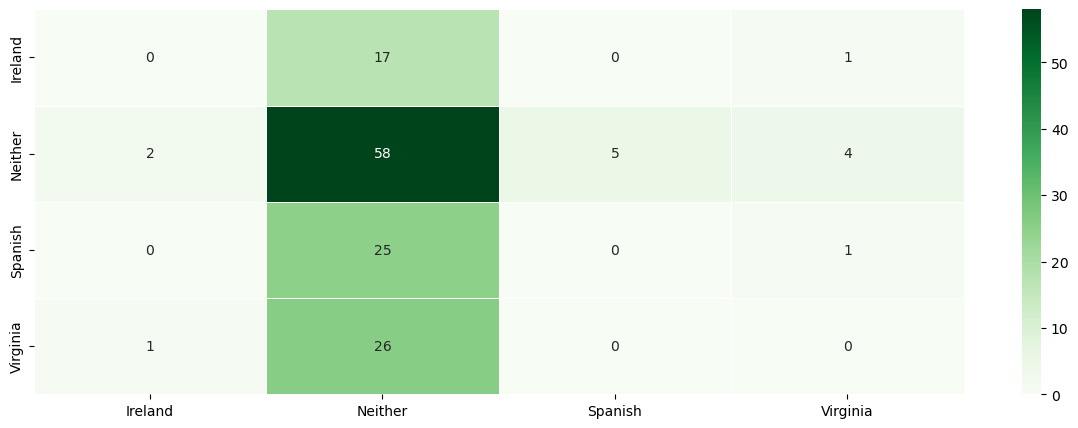

In [56]:
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from matplotlib import pyplot as plt
import seaborn as sns


X_train, X_test, y_train, y_test = train_test_split(readable_results, targets, test_size=0.45, random_state=42)
lr = LogisticRegression(random_state=0, solver='lbfgs', penalty='none', class_weight='balanced')
clf = lr.fit(X_train, y_train)

y_pred = clf.predict(X_test)
# evaluate accuracy
print("Accuracy score:", accuracy_score(y_test, y_pred, normalize=True, sample_weight=None))
print()
print("Results of this run:\n")
print("TCP ID | Actual Classfication | Predicted Classification")
for title, real, predicted in zip(X_test.index, y_test, y_pred):
    print(f"{title} | {real} | {predicted}")
    
print("Cross validation score:", np.mean(cross_val_score(lr, readable_results, targets, cv=5)))
cm = confusion_matrix(y_test,y_pred)
cm_df = pd.DataFrame(cm, columns=clf.classes_, index=clf.classes_)
f, ax = plt.subplots(figsize=(15, 5))
sns.heatmap(cm_df,annot=True,cmap='Greens',linewidths=.5)

Accuracy score: 0.20833333333333334

Results of this run:

TCP ID | Actual Classfication | Predicted Classification
A00983 | Virginia | Virginia
A09864 | Ireland | Virginia
A14521 | Spanish | Virginia
A04077 | Virginia | Spanish
A18907 | Spanish | Ireland
A14516 | Ireland | Spanish
A14518 | Neither | Virginia
A10672 | Virginia | Virginia
A14615 | Virginia | Ireland
A13057 | Spanish | Ireland
A04813 | Neither | Virginia
A73698 | Virginia | Virginia
A16207 | Spanish | Ireland
A22436 | Ireland | Virginia
A22536 | Spanish | Spanish
A11788 | Spanish | Neither
A73990 | Spanish | Virginia
A12690 | Spanish | Virginia
A04079 | Virginia | Ireland
A02681 | Neither | Ireland
A19758 | Ireland | Ireland
A05331 | Spanish | Virginia
A12211 | Spanish | Ireland
A22156 | Spanish | Virginia
A05165 | Spanish | Ireland
B00675 | Spanish | Ireland
A17512 | Virginia | Spanish
B11752 | Virginia | Spanish
A71313 | Spanish | Virginia
A22705 | Ireland | Virginia
A14520 | Virginia | Spanish
A73131 | Virginia | Virg

/opt/conda/envs/rapids/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/opt/conda/envs/rapids/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/opt/conda/envs/rapids/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/opt/conda/envs/rapids/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/opt/conda/envs/rapids/lib/p

Cross validation score: 0.3584677419354839


<Axes: >

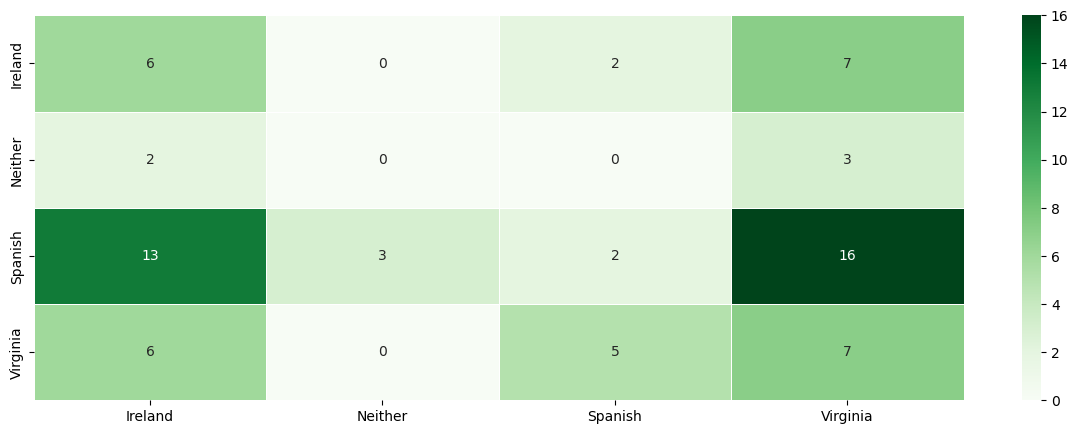

In [35]:
#what about a naive bayes classifier? 
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import seaborn as sns
from matplotlib import pyplot as plt
import numpy as np

X_train, X_test, y_train, y_test = train_test_split(readable_results, targets, test_size=0.45, random_state=42)
gb = GaussianNB()
clf = gb.fit(X_train, y_train)

y_pred = clf.predict(X_test)
# evaluate accuracy
print("Accuracy score:", accuracy_score(y_test, y_pred, normalize=True, sample_weight=None))
print()
print("Results of this run:\n")
print("TCP ID | Actual Classfication | Predicted Classification")
for title, real, predicted in zip(X_test.index, y_test, y_pred):
    print(f"{title} | {real} | {predicted}")

print("Cross validation score:", np.mean(cross_val_score(lr, readable_results, targets, cv=5)))
cm = confusion_matrix(y_test,y_pred)
cm_df = pd.DataFrame(cm, columns=clf.classes_, index=clf.classes_)
f, ax = plt.subplots(figsize=(15, 5))
sns.heatmap(cm_df,annot=True,cmap='Greens',linewidths=.5)


Accuracy score: 0.2361111111111111

Results of this run:

TCP ID | Actual Classfication | Predicted Classification
A00983 | Virginia | Spanish
A09864 | Ireland | Spanish
A14521 | Spanish | Spanish
A04077 | Virginia | Neither
A18907 | Spanish | Spanish
A14516 | Ireland | Spanish
A14518 | Neither | Virginia
A10672 | Virginia | Neither
A14615 | Virginia | Virginia
A13057 | Spanish | Virginia
A04813 | Neither | Spanish
A73698 | Virginia | Virginia
A16207 | Spanish | Neither
A22436 | Ireland | Spanish
A22536 | Spanish | Spanish
A11788 | Spanish | Neither
A73990 | Spanish | Neither
A12690 | Spanish | Spanish
A04079 | Virginia | Ireland
A02681 | Neither | Ireland
A19758 | Ireland | Virginia
A05331 | Spanish | Virginia
A12211 | Spanish | Virginia
A22156 | Spanish | Virginia
A05165 | Spanish | Spanish
B00675 | Spanish | Virginia
A17512 | Virginia | Virginia
B11752 | Virginia | Virginia
A71313 | Spanish | Neither
A22705 | Ireland | Spanish
A14520 | Virginia | Ireland
A73131 | Virginia | Spanish


/opt/conda/envs/rapids/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/opt/conda/envs/rapids/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/opt/conda/envs/rapids/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/opt/conda/envs/rapids/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/opt/conda/envs/rapids/lib/p

Cross validation score: 0.3584677419354839


<Axes: >

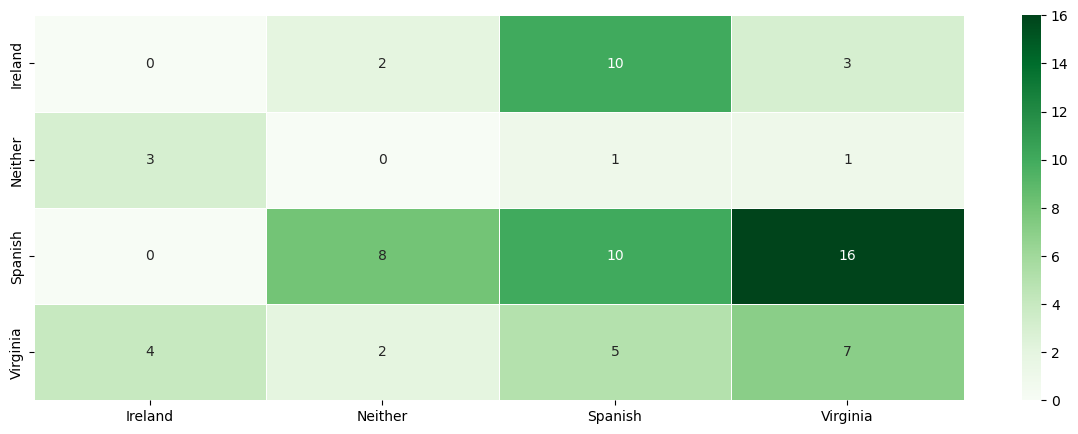

In [37]:
#k-nearest neighbors?
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
#ask giugni about k-nearest neighbor 
knn = KNeighborsClassifier(n_neighbors=5, weights='uniform', algorithm='auto', leaf_size=30, p=2, metric='minkowski', metric_params=None, n_jobs=None)
X_train, X_test, y_train, y_test = train_test_split(readable_results, targets, test_size=0.45, random_state=42)
clf = knn.fit(X_train, y_train)

y_pred = clf.predict(X_test)
# evaluate accuracy
print("Accuracy score:", accuracy_score(y_test, y_pred, normalize=True, sample_weight=None))
print()
print("Results of this run:\n")
print("TCP ID | Actual Classfication | Predicted Classification")
for title, real, predicted in zip(X_test.index, y_test, y_pred):
    print(f"{title} | {real} | {predicted}")
    
print("Cross validation score:", np.mean(cross_val_score(lr, readable_results, targets, cv=5)))
cm = confusion_matrix(y_test,y_pred)
cm_df = pd.DataFrame(cm, columns=clf.classes_, index=clf.classes_)
f, ax = plt.subplots(figsize=(15, 5))
sns.heatmap(cm_df,annot=True,cmap='Greens',linewidths=.5)

In [ ]:
#create and move subcorpuses 
def move_subcorpus(id_list):
    for file in os.scandir(r"/hpc/group/datap2023ecbc/lemmatized_without_stop"):
        name = os.path.basename(file).split(".")[0]
        if name in id_list:
            with open(file, encoding="utf-8") as EPextracted:
                #remember to put the correct pathway for output and input! based off of what you are trying
                #to understand!
                with open(os.path.join(r"/hpc/group/datap2023ecbc/virginia_subcorpus", name), 'w+') as lowerFile:
                    data = EPextracted.read()
                    lowerFile.write(data.lower())
                    